login success!
logout success!


c:\Users\huzhe\.conda\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32929 (\N{CJK UNIFIED IDEOGRAPH-80A1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\huzhe\.conda\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\huzhe\.conda\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\huzhe\.conda\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35777 (\N{CJK UNIFIED IDEOGRAPH-8BC1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\huzhe\.conda\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25351 (\N{CJK UNIFIED IDEOGRAPH-6307}) missing from current fon

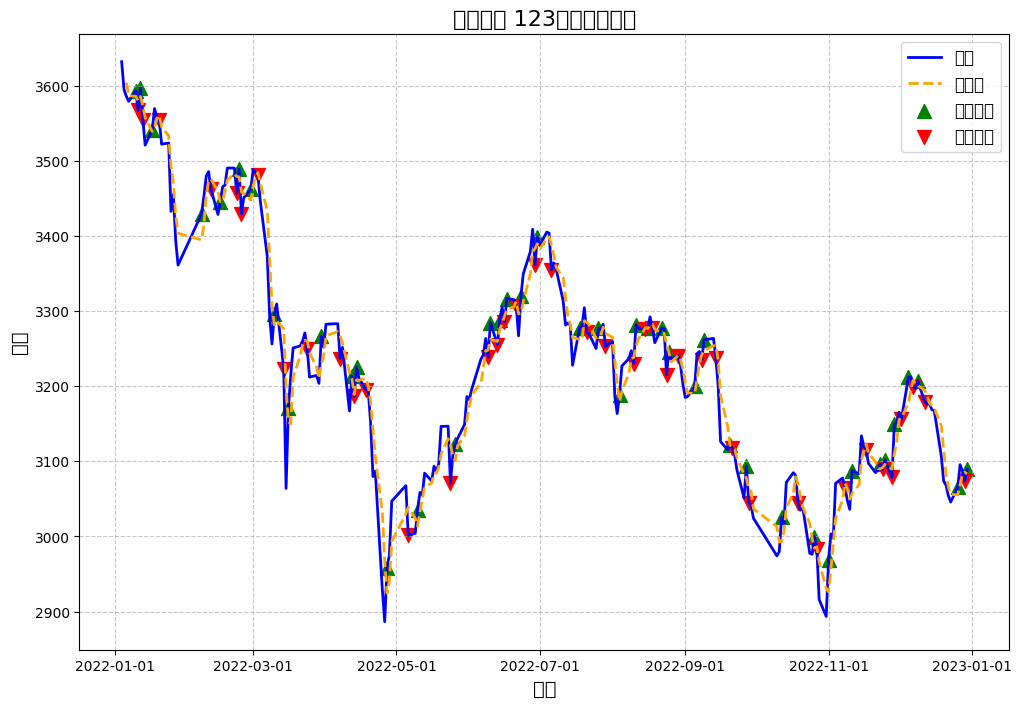

In [5]:
import baostock as bs
import pandas as pd
import matplotlib.pyplot as plt

# 登录baostock系统
lg = bs.login()

# 设置股票代码和时间范围
stock_code = "sh.000001"  # 上证指数
start_date = "2022-01-01"
end_date = "2022-12-31"

# 获取股票数据
rs = bs.query_history_k_data(stock_code,
                              "date,open,high,low,close",
                              start_date=start_date,
                              end_date=end_date,
                              frequency="d",
                              adjustflag="3")  # adjustflag="3"表示不复权
data = rs.get_data()

# 登出baostock系统
bs.logout()

# 创建DataFrame
df = data[['date', 'open', 'high', 'low', 'close']].rename(columns={'date': 'Date'})

# 转换日期格式
df['Date'] = pd.to_datetime(df['Date'])

# 将股价数据转换为数值类型
df[['open', 'high', 'low', 'close']] = df[['open', 'high', 'low', 'close']].astype(float)

# 计算趋势线
df['Trend'] = df['close'].rolling(window=3).mean()

# 寻找123理论的信号
df['Signal'] = 0  # 默认无信号
df.loc[(df['close'] > df['Trend']) & (df['close'].shift(1) <= df['Trend'].shift(1)), 'Signal'] = 1  # 买入信号
df.loc[(df['close'] < df['Trend']) & (df['close'].shift(1) >= df['Trend'].shift(1)), 'Signal'] = -1  # 卖出信号

# 创建一个美化的图表
plt.figure(figsize=(12, 8))

# 绘制股价曲线
plt.plot(df['Date'], df['close'], label='股价', linewidth=2, color='blue')

# 绘制趋势线
plt.plot(df['Date'], df['Trend'], label='趋势线', linestyle='--', linewidth=2, color='orange')

# 标记买卖信号
buy_signals = df[df['Signal'] == 1]
sell_signals = df[df['Signal'] == -1]
plt.scatter(buy_signals['Date'], buy_signals['close'], marker='^', color='g', label='买入信号', s=100)
plt.scatter(sell_signals['Date'], sell_signals['close'], marker='v', color='r', label='卖出信号', s=100)

# 添加网格
plt.grid(True, linestyle='--', alpha=0.7)

# 设置图表标题和标签
plt.title(f'上证指数 123理论和趋势线', fontsize=16)
plt.xlabel('日期', fontsize=14)
plt.ylabel('股价', fontsize=14)

# 调整x轴日期标签的格式
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

# 显示图例
plt.legend(fontsize=12)

# 显示图表
plt.show()
